In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.utils.data as dutils

In [4]:
device = 'cpu'
seed = 99
torch.manual_seed(seed);

In [49]:
def getfake(samples, dimensions, epsilon):
    wfake = torch.randn(dimensions)   # fake weight vector for separation
    bfake = torch.randn(1)            # fake bias
    wfake = wfake / torch.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = torch.zeros(size=(samples, dimensions))
    Y = torch.zeros(samples)
#     print(wfake, bfake)
    i = 0
    while (i < samples):
        tmp = torch.randn(dimensions)
        margin = torch.dot(tmp, wfake) + bfake
        if (torch.norm(tmp).item() < 3) and (abs(margin.item()) > epsilon):
            X[i,:] = tmp
            Y[i] = 1 if margin.item() > 0 else -1
#             print(torch.norm(tmp), tmp, margin, Y[i])
            i += 1
    return X, Y

# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        color = 'r' if y.item() == 1 else 'b'
        plt.scatter(x[0].item(), x[1].item(), color=color)

# plot contour plots on a [-3,3] x [-3,3] grid
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = torch.zeros(size=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = torch.from_numpy(xx)
    zz[:,:,1] = torch.from_numpy(yy)
    
    vv = torch.zeros(size=(xgrid.size, ygrid.size))
    for i in range(xgrid.size):
        for j in range(ygrid.size):
#             print(zz[i,j])
#             torch.dot(zz[i,j], w) + d
            vv[i, j] = torch.dot(zz[i,j], w) + d
        
    CS = plt.contour(xgrid,ygrid,vv.numpy())
    plt.clabel(CS, inline=1, fontsize=10)
    

In [46]:
a = torch.zeros(size=(3,32,32))
b = torch.zeros_like(a)
b.shape

torch.Size([3, 32, 32])

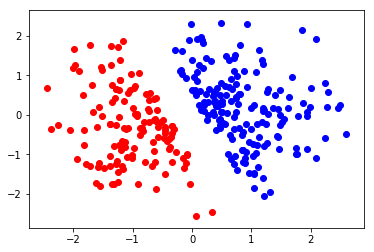

In [63]:
X, Y = getfake(300, 2, 0.3)
plotdata(X,Y)
plt.show()

Encountered an error and updated parameters
data   [-0.7020572   0.55801255], label 1.0
weight [-0.7020572   0.55801255], bias  1.0


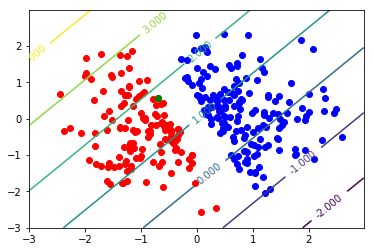

Encountered an error and updated parameters
data   [0.20575394 0.09963998], label -1.0
weight [-0.9078111   0.45837256], bias  0.0


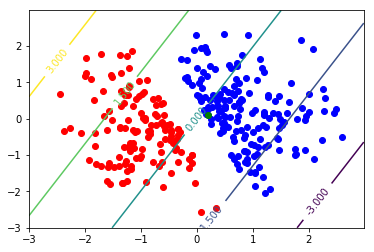

Encountered an error and updated parameters
data   [0.14033677 0.6036518 ], label -1.0
weight [-1.0481479  -0.14527926], bias  -1.0


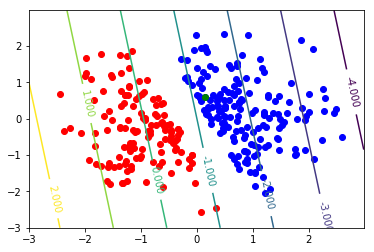

Encountered an error and updated parameters
data   [-0.7330303   0.37883323], label 1.0
weight [-1.7811782   0.23355398], bias  0.0


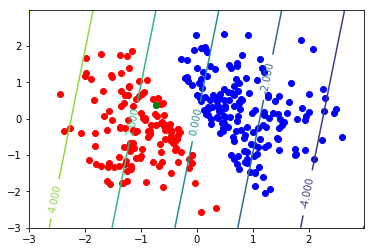

Encountered an error and updated parameters
data   [ 0.06448976 -2.5602012 ], label 1.0
weight [-1.7166885 -2.3266473], bias  1.0


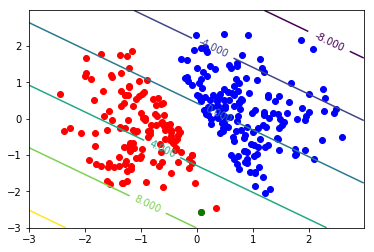

Encountered an error and updated parameters
data   [ 0.78261745 -0.32376504], label -1.0
weight [-2.499306  -2.0028822], bias  0.0


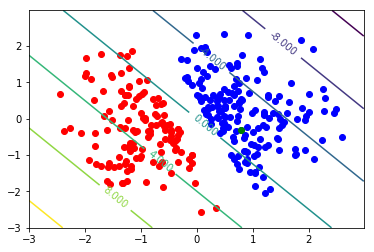

Encountered an error and updated parameters
data   [ 1.0415432 -1.4658521], label -1.0
weight [-3.5408492 -0.5370301], bias  -1.0


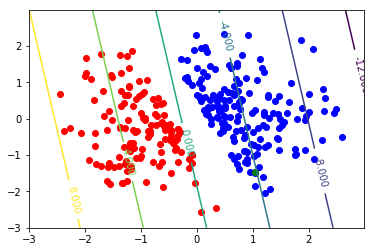

Encountered an error and updated parameters
data   [-0.08528655 -1.0051079 ], label 1.0
weight [-3.6261358 -1.542138 ], bias  0.0


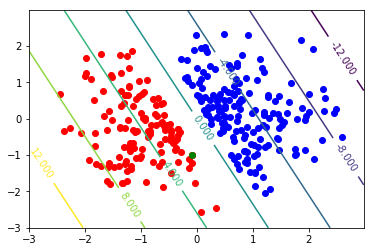

In [64]:
def perceptron(w,b,x,y):
    if (y * (torch.dot(w,x) + b)).item() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = torch.zeros(2)
b = torch.zeros(1)
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x.numpy(),y.item()))
        print('weight {}, bias  {}'.format(w.numpy(),b.item()))
        plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0].item(), x[1].item(), color='g')
        plt.show()